In [3]:
import numpy as np
import re
import os
import autokeras as ak
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
from ReadData import read_data_as_img, read_data_structured, read_data_st
from Models import lenet, alexnet, widenet
from Preprocessing import ros, smote, adasyn
from Results import report_results_imagedata, make_spider_by_temp, report_results_st
from keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from keras import Sequential
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, log_loss, fowlkes_mallows_score, cohen_kappa_score, precision_score, recall_score

In [4]:
model = load_model("st/best_model", custom_objects=ak.CUSTOM_OBJECTS)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11, 200)]         0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 11, 200)           0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 11, 200, 1)        0         
_________________________________________________________________
normalization (Normalization (None, 11, 200, 1)        3         
_________________________________________________________________
conv2d (Conv2D)              (None, 9, 198, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 196, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 98, 64)        

In [6]:
for temp in range(310, 365, 5):
    
    X_test, y_test = read_data_as_img("../data", f"OPNat{temp}K.hg17-test")
    
    y_test_pred = model.predict(X_test).round().astype(int)
    
    print(f"Temperature: {temp}")
    
    print(f"\tPredicciones clase 0: {sum(y_test_pred.round().astype(int) == 0).sum()}")
    print(f"\tPredicciones clase 1: {sum(y_test_pred.round().astype(int) == 1).sum()}")
    print(f"\tInstancias clase 0: {np.count_nonzero(y_test == 0)}")
    print(f"\tInstancias clase 0: {np.count_nonzero(y_test == 1)}")
    
    print(f"\tF1 score: {f1_score(y_test, y_test_pred)}")
    print(f"\tBinary crossentropy: {log_loss(y_test, y_test_pred, eps=1e-15)}")
    print(f"\tAccuracy score: {accuracy_score(y_test, y_test_pred)}")    
    print(f"\tAUC ROC: {roc_auc_score(y_test, y_test_pred)}")

Temperature: 310
	Predicciones clase 0: 1
	Predicciones clase 1: 55
	Instancias clase 0: 51
	Instancias clase 0: 5
	F1 score: 0.16666666666666669
	Binary crossentropy: 30.838907136018637
	Accuracy score: 0.10714285714285714
	AUC ROC: 0.5098039215686274
Temperature: 315
	Predicciones clase 0: 29
	Predicciones clase 1: 27
	Instancias clase 0: 51
	Instancias clase 0: 5
	F1 score: 0.3125
	Binary crossentropy: 13.569119139848203
	Accuracy score: 0.6071428571428571
	AUC ROC: 0.7843137254901961
Temperature: 320
	Predicciones clase 0: 48
	Predicciones clase 1: 8
	Instancias clase 0: 51
	Instancias clase 0: 5
	F1 score: 0.7692307692307693
	Binary crossentropy: 1.8503344281611191
	Accuracy score: 0.9464285714285714
	AUC ROC: 0.9705882352941176
Temperature: 325
	Predicciones clase 0: 51
	Predicciones clase 1: 5
	Instancias clase 0: 51
	Instancias clase 0: 5
	F1 score: 1.0
	Binary crossentropy: 9.992007221626415e-16
	Accuracy score: 1.0
	AUC ROC: 1.0
Temperature: 330
	Predicciones clase 0: 51
	Pre

In [5]:
#report_sub345 = report_results("sub345", "sub345/best_model", "../data")
#report_alltemps = report_results("alltemps", "all_temps/best_model", "../data")
#report_sub345_ros_jba = report_results("sub345_ros_jba","sub345_ros_jba/best_model", "../data")
#report_alltemps_ros_jba = report_results("alltemps_ros_jba", "all_temps_ros_jba/best_model", "../data")
#report_sub345_ros = report_results("sub345_ros", "sub345_ros/best_model", "../data")
#report_alltemps_ros = report_results("alltemps_ros", "all_temps_ros/best_model", "../data")
#report_sub345_smote = report_results("sub345_smote","sub345_smote/best_model", "../data")
#report_alltemps_smote = report_results("alltemps_smote", "all_temps_smote/best_model", "../data")

report_st = report_results_st("st", "st/best_model", "../data")

models_dfs = [(report_st, "st"),
              #(report_alltemps, "alltemps"),
              #(report_sub345, "sub345"), 
              #(report_alltemps_ros_jba, "alltemps_ros_jba"), 
              #(report_sub345_ros_jba, "sub345_ros_jba"),
              #(report_alltemps_ros, "alltemps_ros"), 
              #(report_sub345_ros, "sub345_ros"),
              #(report_alltemps_smote, "alltemps_smote"),
              #(report_sub345_smote, "sub345_smote"),
             ]

/home/jabarbero/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelo entrenado sobre todas las temperaturas sin preprocesado

In [4]:
report_alltemps.style.background_gradient(cmap='RdYlGn')

,temperature,f1score,accuracy,AUC,gmean,kappa,precision,recall
0,310,0,0.910714,0.5,0.913464,0,0,0
1,315,0,0.910714,0.5,0.913464,0,0,0
2,320,0,0.910714,0.5,0.913464,0,0,0
3,325,0,0.910714,0.5,0.913464,0,0,0
4,330,0,0.910714,0.5,0.913464,0,0,0
5,335,0,0.910714,0.5,0.913464,0,0,0
6,340,0,0.910714,0.5,0.913464,0,0,0
7,345,0,0.910714,0.5,0.913464,0,0,0
8,350,0,0.910714,0.5,0.913464,0,0,0
9,355,0,0.910714,0.5,0.913464,0,0,0


## Modelo entrenado sobre temperaturas < 345 sin preprocesado

In [5]:
report_sub345.style.background_gradient(cmap='RdYlGn')

,temperature,f1score,accuracy,AUC,gmean,kappa,precision,recall
0,310,0,0.910714,0.5,0.913464,0,0,0
1,315,0,0.910714,0.5,0.913464,0,0,0
2,320,0,0.910714,0.5,0.913464,0,0,0
3,325,0,0.910714,0.5,0.913464,0,0,0
4,330,0,0.910714,0.5,0.913464,0,0,0
5,335,0,0.910714,0.5,0.913464,0,0,0
6,340,0,0.910714,0.5,0.913464,0,0,0
7,345,0,0.910714,0.5,0.913464,0,0,0
8,350,0,0.910714,0.5,0.913464,0,0,0
9,355,0,0.910714,0.5,0.913464,0,0,0


## Modelo entrenado sobre todas las temperaturas con random oversampling

In [6]:
report_alltemps_ros.style.background_gradient(cmap='RdYlGn')

,temperature,f1score,accuracy,AUC,gmean,kappa,precision,recall
0,310,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
1,315,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
2,320,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
3,325,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
4,330,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
5,335,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
6,340,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
7,345,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
8,350,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
9,355,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1


## Modelo entrenado sobre temperaturas < 345 con random oversampling

In [7]:
report_sub345_ros.style.background_gradient(cmap='RdYlGn')

,temperature,f1score,accuracy,AUC,gmean,kappa,precision,recall
0,310,0.196078,0.267857,0.598039,0.742753,0.0417362,0.108696,1
1,315,0.5,0.821429,0.901961,0.802575,0.42268,0.333333,1
2,320,1,1,1,1,1,1,1
3,325,1,1,1,1,1,1,1
4,330,1,1,1,1,1,1,1
5,335,0.75,0.964286,0.8,0.960113,0.732057,1,0.6
6,340,0.333333,0.928571,0.6,0.92733,0.312883,1,0.2
7,345,0,0.910714,0.5,0.913464,0,0,0
8,350,0,0.910714,0.5,0.913464,0,0,0
9,355,0,0.910714,0.5,0.913464,0,0,0


## Modelo entrenado sobre todas las temperaturas aplicando smote

In [8]:
report_alltemps_smote.style.background_gradient(cmap='RdYlGn')

,temperature,f1score,accuracy,AUC,gmean,kappa,precision,recall
0,310,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
1,315,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
2,320,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
3,325,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
4,330,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
5,335,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
6,340,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
7,345,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
8,350,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1
9,355,0.163934,0.0892857,0.5,0.913464,0,0.0892857,1


## Modelo entrenado sobre temperaturas < 345 aplicando smote

In [9]:
report_sub345_smote.style.background_gradient(cmap='RdYlGn')

,temperature,f1score,accuracy,AUC,gmean,kappa,precision,recall
0,310,0.166667,0.107143,0.509804,0.89403,0.00355872,0.0909091,1
1,315,0.3125,0.607143,0.784314,0.656001,0.190539,0.185185,1
2,320,0.769231,0.946429,0.970588,0.936171,0.740741,0.625,1
3,325,1,1,1,1,1,1,1
4,330,1,1,1,1,1,1,1
5,335,1,1,1,1,1,1,1
6,340,0.571429,0.946429,0.7,0.942861,0.548387,1,0.4
7,345,0,0.910714,0.5,0.913464,0,0,0
8,350,0,0.910714,0.5,0.913464,0,0,0
9,355,0,0.910714,0.5,0.913464,0,0,0


## Modelo entrenado sobre todas las temperaturas apiladas

In [8]:
report_st.style.background_gradient(cmap='RdYlGn')

,f1score,accuracy,AUC,gmean,kappa,precision,recall
0,0.0,0.909075,0.5,0.913603,0.0,0.0,0.0


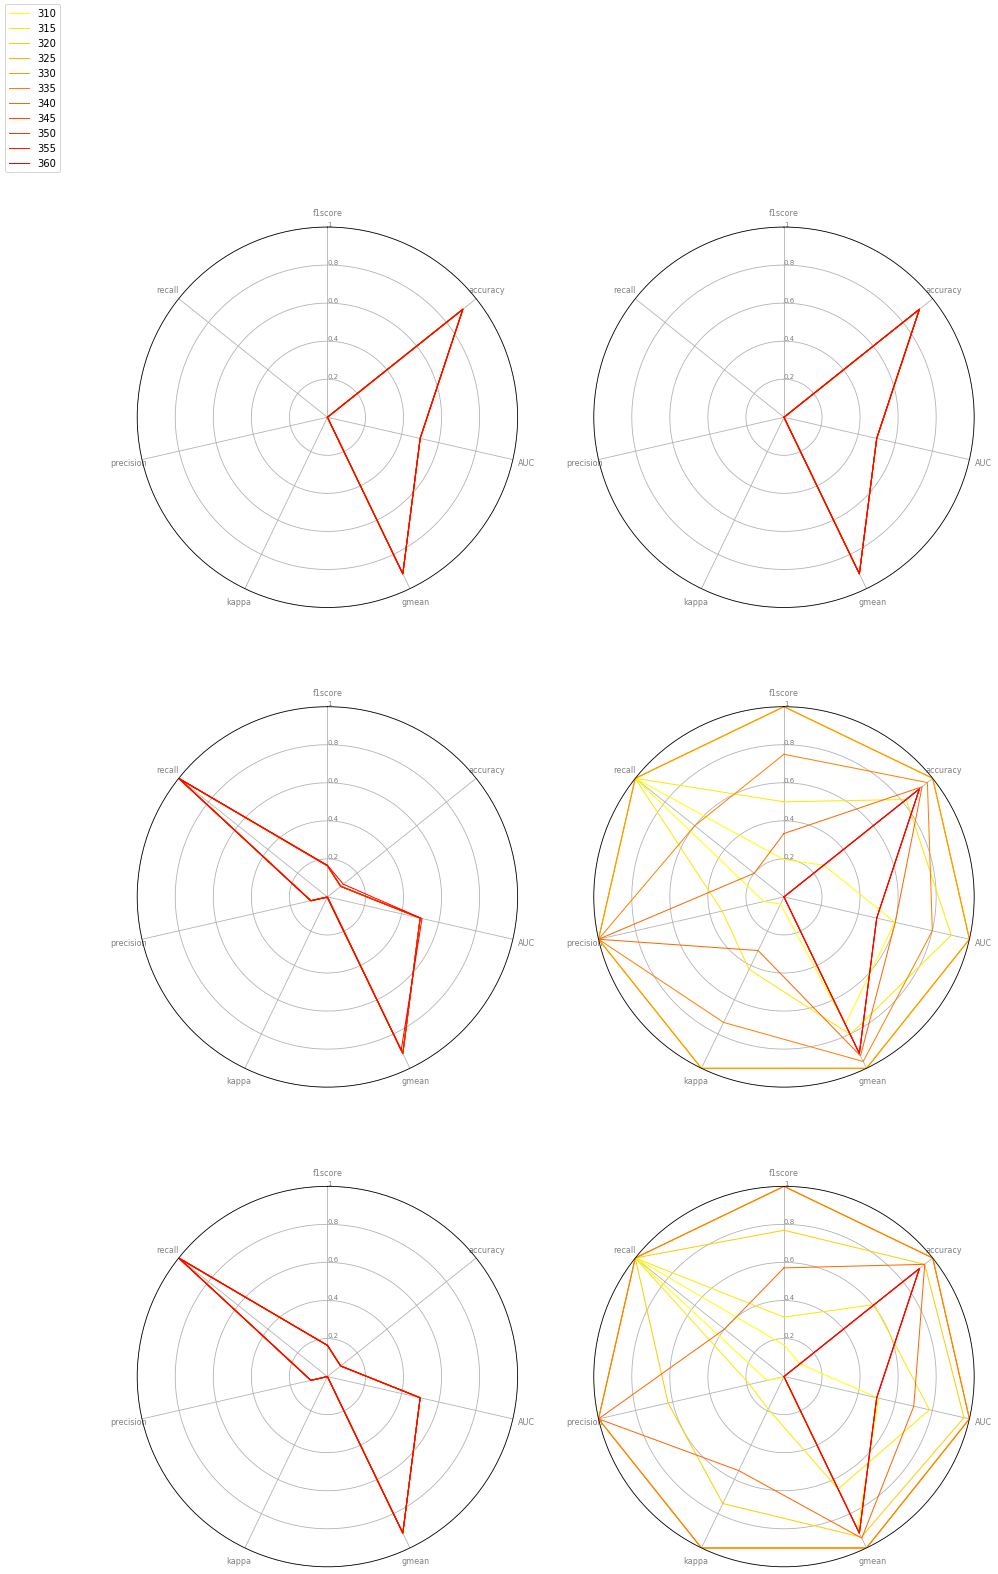

In [10]:
make_spider_by_temp(models_dfs)

# SVM

In [3]:
from sklearn import svmfrom sklearn import svm

In [6]:
data_dir = "../data"
X_train, y_train = read_data_structured(data_dir, "OPNat.*train.*")
X_val, y_val = read_data_structured(data_dir, "OPNat.*val.*")
X_test, y_test = read_data_structured(data_dir, "OPNat.*test.*")

In [ ]:
clf_sub345 = svm.SVC()
clf_sub345.fit(X_train, y_train)